- http://www.universalteacherpublications.com/univ/ebooks/or/index1.htm
- https://katex.org/docs/supported.html


# Queuing Theory (Waiting Line Models)

http://www.universalteacherpublications.com/univ/ebooks/or/Ch10/mmcex.htm


## M/M/c Queuing System (∞/FIFO)

It is a queuing model where the arrivals follow a Poisson process, service times are exponentially distributed and there are c servers. In other words, it is a system with Poisson input, exponential waiting time and Poisson output.

Queue capacity of the system is infinite with first in first out mode. The first M in the notation stands for Poisson input (= exponential distribution of interarrival times), second M for Poisson output (= exponential distribution of processing times), c for the number of servers and ∞ for infinite capacity of the system.

### Formulas M/M/c/∞/FIFO

 performance indicator                                    | Formula                                                                                              |
:---------------------------------------------------------|:-----------------------------------------------------------------------------------------------------|
 utilization                                              | $\rho = \cfrac{\lambda}{c\mu}$                                                                       |
 1/Probability of zero unit in the queue $\cfrac{1}{P_0}$ | $\displaystyle\sum_{n=0}^{c-1} \cfrac{(\lambda/\mu)^n}{n!} + \cfrac{(\lambda/\mu)^c}{c!} * \cfrac{1} {1-\rho}$ |
 Average queue length ($L_q$ )                            | $P_0 * \cfrac{(\lambda/\mu)^c}{c!} * \cfrac{\rho}{(1-\rho)^2}$                                       |  
 Average number of units in the system ($L_s$)            | $L_q + \cfrac{\lambda}{\mu}$                                                                         |
 Average waiting time of an arrival ($W_q$)               | $\cfrac{1}{\lambda} * L_q$                                                                           |
 Average waiting time of an arrival in the system ($W_s$) | $W_q + \cfrac{1}{\mu}$                                                                               |

## Simulation code             

### function(s)

A function MMc is created to run the simulation with parameters:

 parameter                | description
:-------------------------|:--------------------------------------------------------------------
 arrival_rate $(\lambda)$ | mean arrivals in cars/hour as poisson arrival distribution.
 processing_rate $(\mu)$  | mean charging capacity in cars/hour as expontential distribution.
 charging_stations $(c)$  | number of charging stations 
 sim_time                 | simulation time
 random_seed              | seed number to use  

 A function MMc_clt is created to execute the simulation multiple times and use Central Limit Theorem on the mean     

In [3]:
# packages
import salabim as sim
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

from scipy.special import factorial

In [4]:
# Queueing Theory Formulas
# ------------------------
def mm1(lamb, mu):
    """M/M/1 queueing theory formula"""
    rho = lamb / mu  # utilization factor
    P0 = 1 - rho  # probability of no customers in the system
    Lq = rho**2 / (1 - rho)  # average number of customers in the queue
    Ls = rho / (1 - rho)  # average number of customers in the system
    Wq = rho / (mu - lamb)  # average time a customer spends in the queue
    Ws = 1 / (mu - lamb)  # average time a customer spends in the system
    return {
        "lambda": lamb.__round__(2),
        "mu": mu.__round__(2),
        "c": 1,
        "RO": rho,
        "P0": P0,
        "Lq": Lq,
        "Wq": Wq,
        "Ls": Ls,
        "Ws": Ws,
    }


def mmc(arrival_rate, processing_rate, charging_stations, decimals=2):
    """M/M/c queueing theory formula"""
    lamb = arrival_rate
    mu = processing_rate
    c = charging_stations
    # utilization factor
    rho = lamb / (c * mu)
    # probability of no customers in the system
    P0 = 1 / (
        sum([(c * rho) ** n / factorial(n) for n in range(c)])
        + (c * rho) ** c / (factorial(c) * (1 - rho))
    )
    # average number of customers in the system
    Lq = P0 * rho / (1 - rho) ** 2 * (c * rho) ** c / factorial(c)
    # average number of customers in the queue
    Ls = Lq + c * rho
    # average time a customer spends in the queue
    Wq = 1 / lamb * Lq
    # average time a customer spends in the system
    Ws = 1 / mu + Wq
    return {
        "lambda": lamb.__round__(decimals),
        "mu": mu.__round__(decimals),
        "c": c,
        "RO": rho.__round__(decimals),
        "P0": P0.__round__(decimals),
        "Lq": Lq.__round__(decimals),
        "Wq": Wq.__round__(decimals),
        "Ls": Ls.__round__(decimals),
        "Ws": Ws.__round__(decimals),
    }

In [5]:
print(pd.DataFrame(mm1(40 / 60, 50 / 60), index=[0]).to_string(index=False))
print("\n")
print(pd.DataFrame(mmc(40 / 60, 50 / 60, 1), index=[0]).to_string(index=False))

 lambda   mu  c  RO  P0  Lq  Wq  Ls  Ws
   0.67 0.83  1 0.8 0.2 3.2 4.8 4.0 6.0


 lambda   mu  c  RO  P0  Lq  Wq  Ls  Ws
   0.67 0.83  1 0.8 0.2 3.2 4.8 4.0 6.0


In [51]:
arrival_rate = 48 / 60
processing_rate = 50 / 60

# Assume we have the following list
Stations = range(1, 10)

# Create an empty list to store the dictionaries
dict_list = []

# Loop over the list
for i in Stations:
    # Each iteration generates a dictionary that represents a row of data

    row_dict = mmc(arrival_rate * i, processing_rate, i)
    # Append the dictionary to the list
    dict_list.append(row_dict)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(dict_list)

print(df)

   lambda    mu  c    RO    P0     Lq     Wq     Ls     Ws
0     0.8  0.83  1  0.96  0.04  23.04  28.80  24.00  30.00
1     1.6  0.83  2  0.96  0.02  22.57  14.11  24.49  15.31
2     2.4  0.83  3  0.96  0.01  22.21   9.25  25.09  10.45
3     3.2  0.83  4  0.96  0.00  21.91   6.85  25.75   8.05
4     4.0  0.83  5  0.96  0.00  21.64   5.41  26.44   6.61
5     4.8  0.83  6  0.96  0.00  21.40   4.46  27.16   5.66
6     5.6  0.83  7  0.96  0.00  21.18   3.78  27.90   4.98
7     6.4  0.83  8  0.96  0.00  20.98   3.28  28.66   4.48
8     7.2  0.83  9  0.96  0.00  20.79   2.89  29.43   4.09


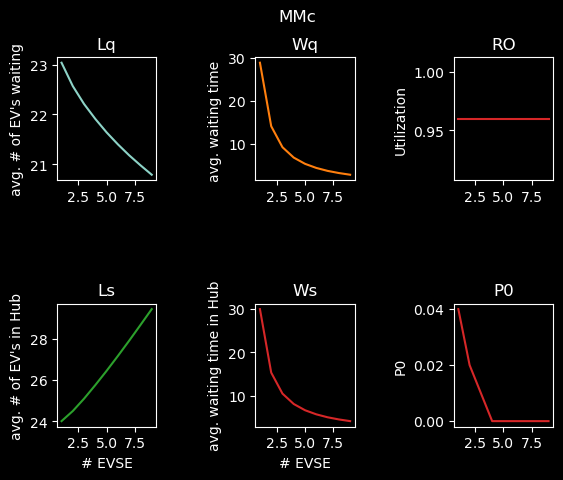

In [7]:
# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 3)

# # Add a title for the whole figure
fig.suptitle("MMc")

# Plot data on each subplot
axs[0, 0].plot(df.c, df.Lq)
# axs[0, 0].plot(df.c, df.Ls, 'tab:blue')
axs[0, 0].set_ylabel("avg. # of EV's waiting")
axs[0, 0].set_title(f"{df.Lq.name}")

axs[0, 1].plot(df.c, df.Wq, "tab:orange")
axs[0, 1].set_ylabel("avg. waiting time ")
axs[0, 1].set_title(f"{df.Wq.name}")

axs[1, 0].plot(df.c, df.Ls, "tab:green")
axs[1, 0].set_ylabel("avg. # of EV's in Hub")
axs[1, 0].set_title(f"{df.Ls.name}")
# axs[1, 0].set_title('Axis [1, 0]')

axs[1, 1].plot(df.c, df.Ws, "tab:red")
axs[1, 1].set_ylabel("avg. waiting time in Hub")
axs[1, 1].set_title(f"{df.Ws.name}")
# axs[1, 1].set_title('Axis [1, 1]')

axs[0, 2].plot(df.c, df.RO, "tab:red")
axs[0, 2].set_ylabel("Utilization")
axs[0, 2].set_title(f"{df.RO.name}")
# axs[1, 1].set_title('Axis [1, 1]')

axs[1, 2].plot(df.c, df.P0, "tab:red")
axs[1, 2].set_ylabel("P0")
axs[1, 2].set_title(f"{df.P0.name}")

# axs[1, 1].set_title('Axis [1, 1]')
# Plot data on each subplot
for i in range(2):
    for j in range(2):
        # axs[i, j].plot(x, y)
        # axs[i, j].set_title(f'Axis [{i}, {j}]')
        axs[1, j].set_xlabel("# EVSE")  # Set x-label for all subplots

# Adjust the space between subplots
plt.subplots_adjust(hspace=1, wspace=1)


# Display the plot
plt.show()

# # Create a line plot
# plt.plot(
#     df.c,
#     df.Lq,
#     label="Lq",
#     color="gray",
#     marker="o",
#     linestyle="dashed",
#     linewidth=1,
#     markersize=2,
#     alpha=0.5,
#     markerfacecolor="red",
#     markeredgecolor="red",
#     markeredgewidth=2,
# )

# # Add labels and title
# plt.xlabel("number of EVSE")
# plt.ylabel("average number of customers in the queue")
# plt.title("Utilization")

# # Display the plot
# plt.show()

In [36]:
# simulation code for MMc queue
def sim_MMC(
    arrival_rate,
    processing_rate,
    charging_stations=1,
    sim_time=50000,
    time_unit="minutes",
    random_seed=123456,
    run=1,
):
    # Generator which creates cars
    class CarGenerator(sim.Component):
        # setup method is called when the component is created
        # and is used to initialize the component
        # switch off monitoring for mode and status
        def setup(self):
            self.mode.monitor(False)
            self.status.monitor(False)

        def process(self):
            while True:
                Car(name="Car")
                self.hold(iat_distr.sample())

    class Car(sim.Component):
        def setup(self):
            self.mode.monitor(False)
            self.status.monitor(False)

        def process(self):
            self.enter(waitingline)
            for ChargingStation in ChargingStations:
                if ChargingStation.ispassive():
                    ChargingStation.activate()
                    break  # activate at most one charging station
            self.passivate()

    class ChargingStation(sim.Component):
        def setup(self):
            self.mode.monitor(False)
            self.status.monitor(False)

        def process(self):
            while True:
                while len(waitingline) == 0:
                    self.passivate()
                self.car = waitingline.pop()
                self.hold(srv_distr.sample())
                self.car.activate()

    N_STATION = charging_stations
    iat_distr = sim.Exponential(1 / arrival_rate)
    srv_distr = sim.Exponential(1 / processing_rate)

    # https://www.salabim.org/manual/Reference.html#environment
    app = sim.App(
        trace=False,  # defines whether to trace or not
        random_seed=random_seed,  # if “*”, a purely random value (based on the current time)
        time_unit=time_unit,  # defines the time unit used in the simulation
        name="Charging Station",  # name of the simulation
        do_reset=True,  # defines whether to reset the simulation when the run method is called
        yieldless=True,  # defines whether the simulation is yieldless or not
    )

    # Instantiate and activate the client generator
    CarGenerator(name="Electric Cars Generator")

    # Create Queue and set monitor to stats_only
    # https://www.salabim.org/manual/Queue.html
    waitingline = sim.Queue(name="Waiting Cars", monitor=True)
    # waitingline.length_of_stay.monitor(value=True)
    waitingline.length.reset_monitors(stats_only=True)
    waitingline.length_of_stay.reset_monitors(stats_only=True)

    # Instantiate the servers, list comprehension but only 1 server
    ChargingStations = [ChargingStation() for _ in range(N_STATION)]

    # Execute Simulation
    app.run(till=sim_time)

    # Return results
    return {
        "run": run,
        "lambda": arrival_rate,
        "mu": processing_rate,
        "c": charging_stations,
        "Wq": waitingline.length_of_stay.mean(),
        "Lq": waitingline.length.mean(),
    }


# student-t distribution
# https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values
def t_sd(df, col, confidence_interval, sides="both", decimals=3):
    if sides != "both":
        ci = confidence_interval
    else:
        ci = confidence_interval + (1 - confidence_interval) / 2

    # column of interest
    x = df[col]

    # number of SD for confidence interval
    tdst = st.t.ppf(ci, df=x.__len__())

    return pd.DataFrame(
        {
            "name": col,
            "mean": x.mean().round(decimals),
            "lbnd": (x.mean() - tdst * x.std() / np.sqrt(x.__len__())).round(decimals),
            "ubnd": (x.mean() + tdst * x.std() / np.sqrt(x.__len__())).round(decimals),
            "stdv": x.std().round(decimals),
            "tdst": tdst.round(decimals),
            "runs": x.__len__(),
        },
        index=[0],
    )


# function to run simulation X times
# Calculate mean and confidence interval using cenral limit theorem
def sim_x_MMC(
    arrival_rate,
    processing_rate,
    charging_stations=1,
    sim_time=50000,
    number_of_simulations=30,
):
    sim_runs = []

    # Run simulation X times with different random seeds
    for i in range(number_of_simulations):
        sim_runs.append(
            sim_MMC(
                arrival_rate=arrival_rate,
                processing_rate=processing_rate,
                charging_stations=charging_stations,
                sim_time=sim_time,
                random_seed=i,
                run=i,
            )
        )

    # Concatenate all runs
    return pd.DataFrame(sim_runs)
    # df = pd.concat(sim_runs, axis=0, ignore_index=True)
    
    # Calculate mean and confidence interval for waiting time
    # res = []
    # res.append(t_sd(df, "Wq", confidence_interval=0.95, sides="both", decimals=3))
    # res.append(t_sd(df, "Lq", confidence_interval=0.95, sides="both", decimals=3))

    # # return results
    # return pd.concat(res, axis=0, ignore_index=True)
# ,
    # confidence_interval=0.95

In [ ]:
# Initialize an empty list
dfs = []

for j in Stations:
    df = sim_x_MMC(
        arrival_rate=j * arrival_rate,
        processing_rate=processing_rate,
        charging_stations=j,
        sim_time=50000,
        number_of_simulations=30,
    )

    # Append df to dfs
    dfs.append(df)

# Concatenate all DataFrames in dfs
df_total = pd.concat(dfs, ignore_index=True)

df_total.to_csv("df_total.csv")

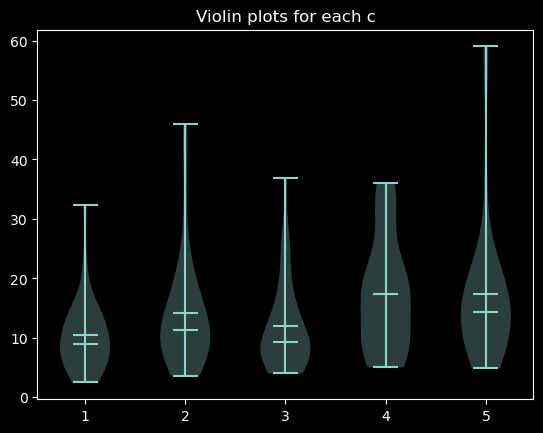

In [50]:
# read df_total from csv
df_total = pd.read_csv("df_total.csv")

# Get unique 'c' values
c_values = df_total['c'].unique()

# Create a list of arrays, where each array contains the 'Lq' values for a unique 'c' value
data = [df_total[df_total['c'] == c]['Lq'].values for c in c_values]

# Create a violin plot
plt.violinplot(data, showmeans=True, showmedians=False)

# Set x-axis labels to 'c' values
plt.xticks(range(1, len(c_values) + 1), c_values)

# Set title
plt.title('Violin plots for each c')

# Display the plot
plt.show()

ValueError: List of violinplot statistics and `positions` values must have the same length

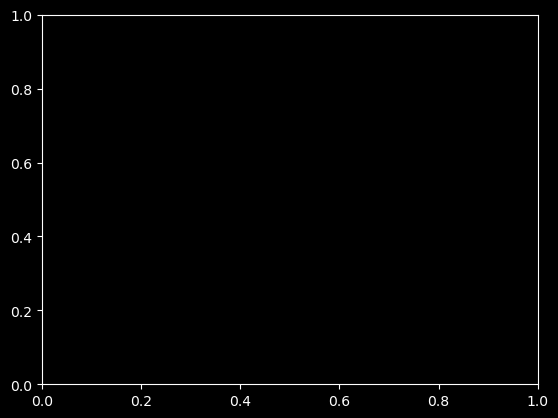

In [45]:
# Create a violin plot for column 'A'
plt.violinplot(df['Lq'], positions=df['c'], showmeans=True, showmedians=True)

# # Create a violin plot for column 'B'
# plt.violinplot(df['Wq'], positions=[2], showmeans=True, showmedians=True)

# # Set x-axis labels
# plt.xticks([1, 2], ['', 'Wq'])

# Display the plot
plt.show()

In [23]:
# Assume 'df' is your DataFrame and 'A' and 'B' are the columns you want to plot

df1 = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
# Create a violin plot for column 'A'
plt.violinplot(df['A'], positions=[1], showmeans=True, showmedians=True)

# Create a violin plot for column 'B'
plt.violinplot(df['B'], positions=[2], showmeans=True, showmedians=True)

# Set x-axis labels
plt.xticks([1, 2], ['A', 'B'])

# Display the plot
plt.show()

KeyError: 'A'

## Example 1

Cars arrive at a single charging station according to a Poisson input process with a mean rate of 40 per hour. The time required to charge a car has an exponential distribution with a mean of 50 per hour. Cars are charged by a single charging station.

> Find the average waiting time of a car.

#### Solution

Given:

$\lambda = 40/hour$, $\mu = 50/hour$

Average waiting time of a car before receiving service ($W_q$) = $\cfrac{40}{50(50-40)}$ = 4.8 minutes

#### Simulation of Example 1

In [ ]:
# mathematically calculated results
# instantanious
print(
    mmc(
        arrival_rate=40 / 60, processing_rate=50 / 60, charging_stations=1, decimals=3
    ).to_string(index=False)
)

In [ ]:
# Run simulation X times with different random seeds
# takes about 20 seconds for 20 simulations of 7 days = 10080
print(
    MMc_clt(
        arrival_rate=40 / 60,  # cars per hour
        processing_rate=50 / 60,  # cars per hour
        charging_stations=1,  # charging station
        sim_time=60 * 24 * 7,  # minutes in a week
        number_of_simulations=20,  # simulations
        confidence_interval=0.95,  # confidence interval
    ).to_string(index=False)
)

## Example 2

New Delhi Charging Hub has a single charging station. During the rush hours, customers arrive at the rate of 10 per hour. The average number of customers that can be served is 12 per hour. Find out the following:

1. Probability that the ticket counter is free.
1. Average number of customers in the queue.


### Solution

Given:

$\lambda = 10/hour$, $\mu = 12/hour$

1. Probability that the charging station is free ($P_o$) = $1 - \cfrac{\lambda}{\mu} = 1 - \cfrac{10}{12} = \cfrac{1}{6}$
1. Average number of customers in the queue ($L_q$ ) = $\cfrac{\lambda^2}{\mu(\mu-\lambda)} = \cfrac{10^2}{12(12-10)} = \cfrac{25}{6} = 4.16666$
   

#### Simulation of Example 2

In [ ]:
# mathematically calculated results
# instantanious
print(
    mmc(
        arrival_rate=10 / 60, processing_rate=12 / 60, charging_stations=1, decimals=3
    ).to_string(index=False)
)

In [ ]:
# Run simulation X times with different random seeds
# takes about 25 seconds for 20 simulations of 28 days = 40320
print(
    MMc_clt(
        arrival_rate=10 / 60,  # cars per hour
        processing_rate=12 / 60,  # cars per hour
        charging_stations=1,  # charging station
        sim_time=60 * 24 * 7 * 4,  # minutes in a month
        number_of_simulations=20,  # simulations
        confidence_interval=0.95,  # confidence interval
    ).to_string(index=False)
)

## Example 3

At Bharat charging station, cars arrive according to a Poisson process with an average time of 5 minutes between arrivals. The service time is exponentially distributed with mean time = 2 minutes. On the basis of this information, find out

1. What would be the average queue length?
1. What is the average waiting time of a car before receiving petrol?
1. What would be the average number of customers in the queuing system?
1. What is the average time spent by a car in the petrol pump?

### Solution

Given  

$\lambda = 12/hour$, $\mu = 30/hour$

Average inter arrival time = $\cfrac{1}{\lambda} = 5 minutes = \cfrac{1}{12} = \lambda = 12/hour$
 	 	 	 	 
Average service time =	$\cfrac{1}{\mu} = 2 minutes = \cfrac{1}{30} = \mu = 30/hour$


 Performance Indicator                                                 | Formula 
:----------------------------------------------------------------------|:-----------------------------------------------
 Average queue length ($L_q$ )                                         | $ = \cfrac{12^2}{30(30-12)} = \cfrac{4}{15}$
 Average waiting time of a car before being charged ($W_q$)            | $ = \cfrac{12}{30(30-12)} = $ 1.33 minutes
 Average number of customers, ($L_s$)                                  | $ = \cfrac{12}{30-12} = \cfrac{2}{3}$	 
 Average time spent at the charging station ($W_s$)                    | $ = \cfrac{1}{\mu-\lambda} = \cfrac{1}{30-12} = $ 3.33 minutes

In [ ]:
# mathematically calculated results
# instantanious
print(
    mmc(
        arrival_rate=12 / 60, processing_rate=30 / 60, charging_stations=1, decimals=3
    ).to_string(index=False)
)

In [ ]:
# Run simulation X times with different random seeds
# takes about 30 seconds for 20 simulations of 28 days = 40320
print(
    MMc_clt(
        arrival_rate=12 / 60,  # cars per hour
        processing_rate=30 / 60,  # cars per hour
        charging_stations=1,  # charging station
        sim_time=60 * 24 * 7 * 4,  # minutes in a month
        number_of_simulations=20,  # simulations
        confidence_interval=0.95,  # confidence interval
    ).to_string(index=False)
)

In [ ]:
%%script false --no-raise-error
# Resource method
# https://www.salabim.org/manual/Modelling.html#the-bank-office-example-with-resources

import salabim as sim


class CarGenerator(sim.Component):
    def setup(self):
        self.mode.monitor(False)
        self.status.monitor(False)

    def process(self):
        while True:
            Car(name="Car")
            self.hold(iat_distr.sample())


class Car(sim.Component):
    def setup(self):
        self.mode.monitor(False)
        self.status.monitor(False)

    def process(self):
        self.request(chargingstations)
        self.hold(srv_distr.sample())
        self.release()  # not really required


N_STATION = 1
iat_distr = sim.Exponential(60 / 12)  # lambda = 12/hour
srv_distr = sim.Exponential(60 / 30)  # mu     = 30/hour

# https://www.salabim.org/manual/Reference.html#environment
app = sim.App(
    trace=False,  # defines whether to trace or not
    random_seed="*",  # if “*”, a purely random value (based on the current time)
    time_unit="minutes",  # defines the time unit used in the simulation
    name="Charging Station",  # name of the simulation
    do_reset=True,  # defines whether to reset the simulation when the run method is called
    yieldless=True,  # defines whether the simulation is yieldless or not
)

# Instantiate and activate the client generator
CarGenerator(name="Electric Cars Generator")

# Instantiate the servers, list comprehension but only 1 server
chargingstations = sim.Resource(
    name="Charging Stations", capacity=N_STATION, monitor=True
)
chargingstations.requesters().length_of_stay.monitor(value=True)

# Execute Simulation
app.run(till=50000)

# Print statistics
# chargingstations.print_statistics()

Lq = chargingstations.requesters().length.mean()
Ls = Lq + chargingstations.occupancy.mean()
Wq = chargingstations.requesters().length_of_stay.mean()
Ws = Wq + srv_distr.mean()


print(
    "\n",
    "Average queue length: \t\t\t\t\t",
    Lq,
    "\n",
    "Average number of customers: \t\t\t\t",
    Ls,
    "\n",
    "Average time spent at the charging station: \t\t",
    Ws,
    "\n",
    "Average waiting time of a car before being charged: \t",
    Wq,
)

## Example 4

Enexis is considering to operate a single charging station. Management estimates that customers will arrive at the rate of 15 per hour. The charging station can charge a car at the rate of one every 3 minutes.

Assuming Poisson arrivals and exponential service find

1. Average number in the waiting line.
1. Average waiting time in line.
1. Average number in the system.
1. Average waiting time in the system.

### Solution.
Given  

$\lambda = 15/hour$, $\mu = 20/hour$

 Performance Indicator                                                 | Formula 
:----------------------------------------------------------------------|:-----------------------------------------------
 Average queue length ($L_q$ )                                         | $ = \cfrac{15^2}{20(20-15)} = $ 2.25 cars
 Average waiting time of a car before being charged ($W_q$)            | $ = \cfrac{15}{20(20-15)} = $ 0.15 hours = 9 minutes
 Average number of customers, ($L_s$)                                  | $ = \cfrac{15}{20-15} = $ 3 cars	
 Average time spent at the charging station ($W_s$)                    | $ = \cfrac{1}{\mu-\lambda} = \cfrac{1}{20-15} = $ 12 minutes 

In [ ]:
# mathematically calculated results
# instantanious
print(
    mmc(
        arrival_rate=15 / 60, processing_rate=20 / 60, charging_stations=1, decimals=3
    ).to_string(index=False)
)

In [ ]:
# Run simulation X times with different random seeds
# takes about 35 seconds for 20 simulations of 28 days = 40320
print(
    MMc_clt(
        arrival_rate=15 / 60,  # cars per hour
        processing_rate=20 / 60,  # cars per hour
        charging_stations=1,  # charging station
        sim_time=60 * 24 * 7 * 4,  # minutes in a month
        number_of_simulations=20,  # simulations
        confidence_interval=0.95,  # confidence interval
    ).to_string(index=False)
)

In [ ]:
%%script false --no-raise-error
# Resource method
# https://www.salabim.org/manual/Modelling.html#the-bank-office-example-with-resources

import salabim as sim


class CarGenerator(sim.Component):
    def setup(self):
        self.mode.monitor(False)
        self.status.monitor(False)        

    def process(self):
        while True:
            Car(name="Car")
            self.hold(iat_distr.sample())


class Car(sim.Component):
    def setup(self):
        self.mode.monitor(False)
        self.status.monitor(False)        

    def process(self):
        self.request(chargingstations)
        self.hold(srv_distr.sample())
        self.release()  # not really required


N_STATION = 1
iat_distr = sim.Exponential(60 / 15)  # lambda = 12/hour
srv_distr = sim.Exponential(60 / 20)  # mu     = 30/hour

# https://www.salabim.org/manual/Reference.html#environment
app = sim.App(
    trace=False,  # defines whether to trace or not
    random_seed="*",  # if “*”, a purely random value (based on the current time)
    time_unit="minutes",  # defines the time unit used in the simulation
    name="Charging Station",  # name of the simulation
    do_reset=True,  # defines whether to reset the simulation when the run method is called
    yieldless=True,  # defines whether the simulation is yieldless or not
)

# Instantiate and activate the client generator
CarGenerator(name="Electric Cars Generator")

# Instantiate the servers, list comprehension but only 1 server
chargingstations = sim.Resource(
    name="Charging Stations", capacity=N_STATION, monitor=True
)
chargingstations.requesters().length_of_stay.monitor(value=True)

# Execute Simulation
app.run(till=50000)

# Print statistics
# chargingstations.print_statistics()

Lq = chargingstations.requesters().length.mean()
Ls = Lq + chargingstations.occupancy.mean()
Wq = chargingstations.requesters().length_of_stay.mean()
Ws = Wq + srv_distr.mean()


print(
    "\n",
    "Average queue length: \t\t\t\t\t",
    Lq,
    "\n",
    "Average number of customers: \t\t\t\t",
    Ls,
    "\n",
    "Average waiting time of a car before being charged: \t",
    Wq,
    "\n",
    "Average time spent at the charging station: \t\t",
    Ws,
)

## Example 5

Chhabra Saree Emporium has a single charging station. During the rush hours, cars arrive at the rate of 10 per hour. The average number of customers that can be processed by the charging station is 12 per hour. On the basis of this information, find the following:

1. Probability that the charging station is idle
1. Average number of customers in the queue
1. Average time a customer spends in the queue
1. Average number of cars in the queuing system
1. Average time a customer spends in the system


### Solution.
Given  

$\lambda = 10/hour$, $\mu = 12/hour$

 Performance Indicator                                     | Formula 
:----------------------------------------------------------|:-----------------------------------------------
 Probability of zero unit in the queue ($P_o$)             | $ = 1 - \cfrac{\lambda}{\mu} = 1 - \cfrac{10}{12} = \cfrac{1}{6}$
 Average queue length ($L_q$ )                             | $ = \cfrac{\lambda^2}{\mu(\mu-\lambda)} = \cfrac{10^2}{12(12-10)} = \cfrac{25}{6}$ cars
 Average waiting time of an arrival ($W_q$)                | $ = \cfrac{\lambda}{\mu(\mu-\lambda)} = \cfrac{10}{12(12-10)} = $ 25 minutes
 Average number of units in the system ($L_s$)             | $ = \cfrac{\lambda}{\mu-\lambda} = \cfrac{10}{12-10} = $ 5 cars
 Average waiting time of an arrival in the system ($W_s$)  | $ = \cfrac{1}{\mu-\lambda} = \cfrac{1}{12-10} =$ 30 minutes
 
 

In [ ]:
# mathematically calculated results
# instantanious
print(
    mmc(
        arrival_rate=10 / 60, processing_rate=12 / 60, charging_stations=1, decimals=3
    ).to_string(index=False)
)

In [ ]:
# Run simulation X times with different random seeds
# takes about 30 seconds for 30 simulations of 28 days = 40320
print(
    MMc_clt(
        arrival_rate=10 / 60,  # cars per hour
        processing_rate=12 / 60,  # cars per hour
        charging_stations=1,  # charging station
        sim_time=60 * 24 * 7 * 4,  # minutes in a month
        number_of_simulations=30,  # simulations
        confidence_interval=0.95,  # confidence interval
    ).to_string(index=False)
)

In [ ]:
%%script false --no-raise-error
# Resource method
# https://www.salabim.org/manual/Modelling.html#the-bank-office-example-with-resources

import salabim as sim


class CarGenerator(sim.Component):
    def setup(self):
        self.mode.monitor(False)
        self.status.monitor(False)        

    def process(self):
        while True:
            Car(name="Car")
            self.hold(iat_distr.sample())


class Car(sim.Component):
    def setup(self):
        self.mode.monitor(False)
        self.status.monitor(False)        

    def process(self):
        self.request(chargingstations)
        self.hold(srv_distr.sample())
        self.release()  # not really required


N_STATION = 1
iat_distr = sim.Exponential(60 / 10)  # lambda = 10/hour
srv_distr = sim.Exponential(60 / 12)  # mu     = 12/hour

# https://www.salabim.org/manual/Reference.html#environment
app = sim.App(
    trace=False,  # defines whether to trace or not
    random_seed="*",  # if “*”, a purely random value (based on the current time)
    time_unit="minutes",  # defines the time unit used in the simulation
    name="Charging Station",  # name of the simulation
    do_reset=True,  # defines whether to reset the simulation when the run method is called
    yieldless=True,  # defines whether the simulation is yieldless or not
)

# Instantiate and activate the client generator
CarGenerator(name="Electric Cars Generator")

# Instantiate the servers, list comprehension but only 1 server
chargingstations = sim.Resource(
    name="Charging Stations", capacity=N_STATION, monitor=True
)
chargingstations.requesters().length_of_stay.monitor(value=True)

# Execute Simulation
app.run(till=50000)

# Print statistics
# chargingstations.print_statistics()

P0 = 1 - chargingstations.occupancy.mean()
Lq = chargingstations.requesters().length.mean()
Ls = Lq + chargingstations.occupancy.mean()
Wq = chargingstations.requesters().length_of_stay.mean()
Ws = Wq + srv_distr.mean()


print(
    "\n",
    "Probability that the charging station is free: \t",
    P0,
    "\n",
    "Average number of customers: \t\t\t\t",
    Ls,    
    "\n",
    "Average time spent at the charging station: \t\t",
    Ws,    
    "\n",
    "Average queue length: \t\t\t\t\t",
    Lq,
    "\n",
    "Average waiting time of a car before being charged: \t",
    Wq,

)